In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm, skew
from IPython.core.interactiveshell import InteractiveShell


plt.rcParams['figure.figsize']=(15,8)


In [2]:
#Open file and Save to Dataframe:
file = open(r'C:\Users\eshai\SB Projects\Cap 2\train.csv')
file2 = open(r'C:\Users\eshai\SB Projects\Cap 2\test.csv')

traindf = pd.read_csv(file)
testdf = pd.read_csv(file2)

file.close()
file2.close()

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Identify other missing data in training set:
total = traindf.isnull().sum().sort_values(ascending=False)
percent = (traindf.isnull().sum()/traindf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
# Identify other missing data in test set
total = testdf.isnull().sum().sort_values(ascending=False)
percent = (testdf.isnull().sum()/testdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


A quick overview of the data reveals that we have columns that have a majority of nan values. These columns will need to be removed. As for the nan values in the other columns, I will remove those obsevations from the data set as well.

In [6]:
#Removing variables that are mostly full of nan values:
df = traindf.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'LotFrontage','Id'], axis=1)
df = df.dropna().reset_index(drop=True)


In [7]:
#Removing variables that are mostly full of nan values:
testdf = testdf.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'LotFrontage','Id'], axis=1)
testdf = testdf.dropna().reset_index(drop=True)

Dropped columns that contained nan values and observations that contained missing values so the Data set contains only complete records.

### EDA

In [8]:
import scipy

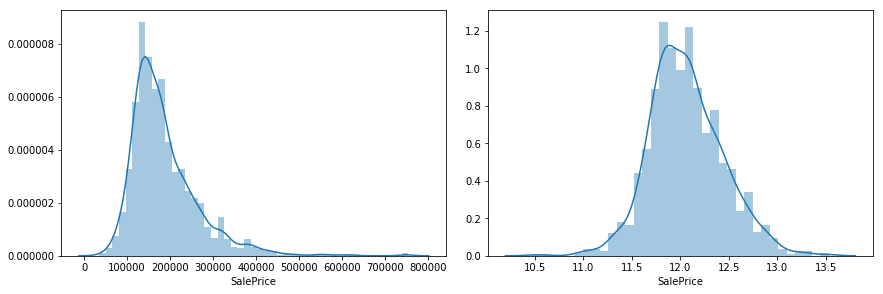

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
plt.tight_layout()

sns.distplot(np.log(df.SalePrice), ax = ax[1], label='Log of Price')

sns.distplot(df.SalePrice, ax = ax[0], label='Distribution of Sale Price')
plt.show()


In [10]:
scipy.stats.skew(df.SalePrice, axis=0, bias=True)

1.9415059461368915

Looking at the distribution of Sale Price, we can see from the plot and the computed skewness that our distribution is skewed towards the right. Taking the log of Sale price shows a more normal distribution.

In [11]:
#check that all values are filled:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 74 columns):
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-null object
MasVnrArea       1338 non

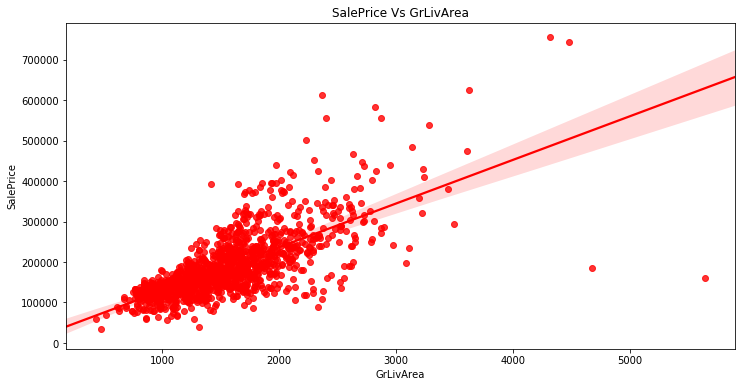

In [12]:
#plot Sale Price and 'GrLivArea' Scatter plot:
plt.figure(figsize = (12, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, color='red')
plt.title('SalePrice Vs GrLivArea')
plt.show()

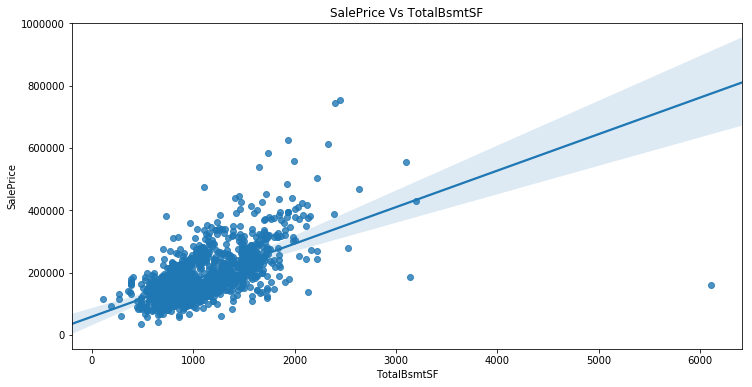

In [13]:
#plot Scatter plot of Sale Price and 'TotalBsmtSF'
plt.figure(figsize = (12, 6))
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df,)
plt.title('SalePrice Vs TotalBsmtSF')
plt.show()

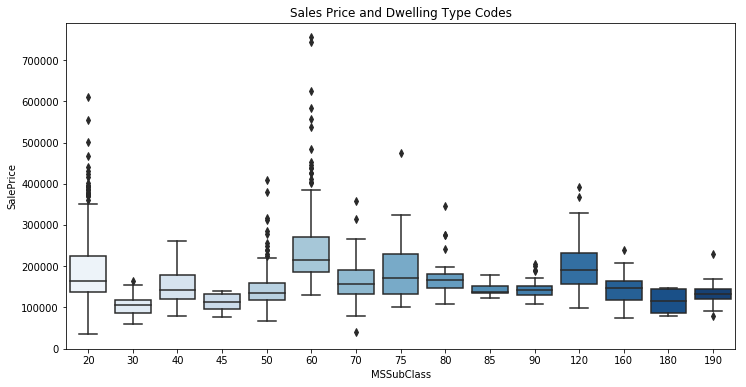

In [14]:
# Plot Box plot of 'MSSubClass Codes:
plt.figure(figsize = (12, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=df, palette="Blues")
plt.title('Sales Price and Dwelling Type Codes')
plt.show()

MSSubClass Codes:

- 20:	1-STORY 1946 & NEWER ALL STYLES
- 30:	1-STORY 1945 & OLDER
- 40:	1-STORY W/FINISHED ATTIC ALL AGES
- 45:	1-1/2 STORY - UNFINISHED ALL AGES
- 50:	1-1/2 STORY FINISHED ALL AGES
- 60:	2-STORY 1946 & NEWER 
- 70:	2-STORY 1945 & OLDER
- 75:	2-1/2 STORY ALL AGES
- 80:	SPLIT OR MULTI-LEVEL
- 85:	SPLIT FOYER
- 90:	DUPLEX - ALL STYLES AND AGES
- 120:	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150:	1-1/2 STORY PUD - ALL AGES
- 160:	2-STORY PUD - 1946 & NEWER
- 180:	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190:	2 FAMILY CONVERSION - ALL STYLES AND AGES

The Plot reveals 2-Story homes bulit after 1945 are priced higher on average while 1-story 1945 & older have the lowest average sale price.

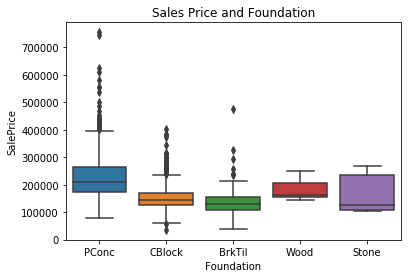

In [15]:
sns.boxplot(x='Foundation', y='SalePrice', data=df)
plt.title('Sales Price and Foundation')
plt.show()

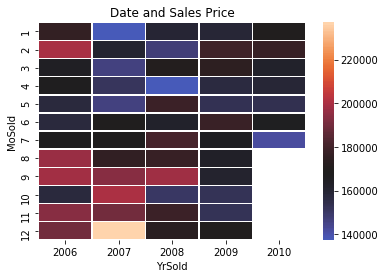

In [16]:
# Look at  how avg sale price changed over time:
pt = df.pivot_table("SalePrice", "MoSold", "YrSold", aggfunc='median')
ax = sns.heatmap(pt, linewidths=.5, center=np.median(df.SalePrice))
plt.title('Date and Sales Price')
plt.show()

Looking at the heatmap of sales price and homes, housing prices peaked in late 2007 then started to decline. This decline coinsides with the decline in the average Sales price of homes in the US

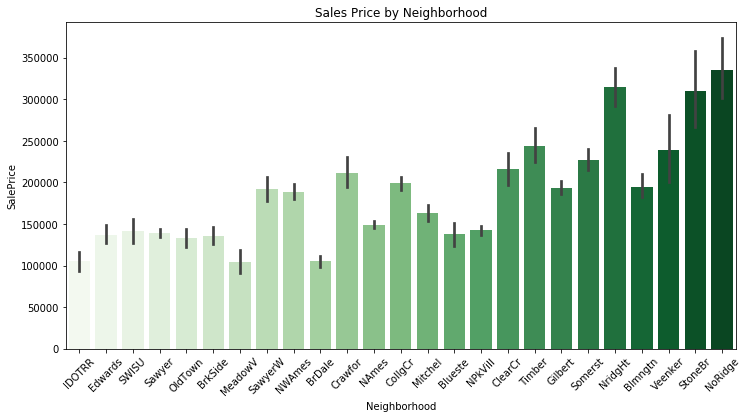

In [17]:
# View Price by Neighborhood:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df.sort_values(by='SalePrice'), palette='Greens')
xt = plt.xticks(rotation=45)
plt.title('Sales Price by Neighborhood')
plt.show()

The ‘Sales Price by Neighborhood’ Plot shows ‘NoRidge’, ‘StoneBr’, and ‘NridgeHt’ are the neighborhoods with the highest average sales price. It seems that ‘BrDale’, ‘MeadowV’, and ‘IDOTRR’ are neighborhoods with the lowest average sales price. 

In [18]:
#investigate GrLivArea of above neighborhood homes.
chomes = df[df['Neighborhood'] == 'MeadowV']
ahomes = df[df['Neighborhood'] == 'BrDale']
bhomes = df[df['Neighborhood'] == 'IDOTRR']

ln = pd.concat([chomes, ahomes, bhomes], axis=0)

ln.GrLivArea.describe()

count      56.000000
mean     1148.392857
std       301.684102
min       480.000000
25%       987.000000
50%      1111.500000
75%      1302.500000
max      2521.000000
Name: GrLivArea, dtype: float64

In [19]:
df.GrLivArea.describe()

count    1338.000000
mean     1537.585202
std       520.579960
min       438.000000
25%      1160.000000
50%      1480.000000
75%      1791.500000
max      5642.000000
Name: GrLivArea, dtype: float64

Homes in the above mentioned neighborhood have a significantly lower average GrLivArea that the data set. 

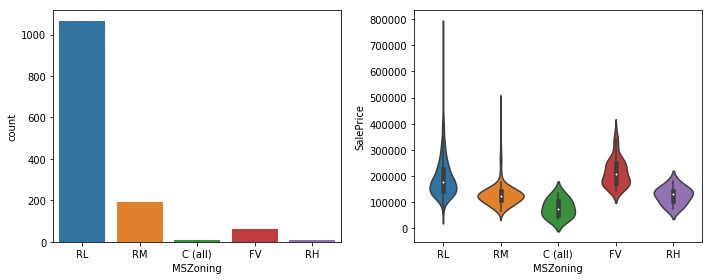

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.violinplot(x = 'MSZoning', y = 'SalePrice', data = df)
sns.countplot('MSZoning', data = df,ax = ax[0])
plt.tight_layout()
plt.show()

#### MSZoning Codes:
 - A:	Agriculture
 - C:	Commercial
 - FV:	Floating Village Residential
 - I:	Industrial
 - RH:	Residential High Density
 - RL:	Residential Low Density
 - RP:	Residential Low Density Park 
 - RM:	Residential Medium Density

# Statistical Analysis

In [21]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from collections import defaultdict

In [22]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

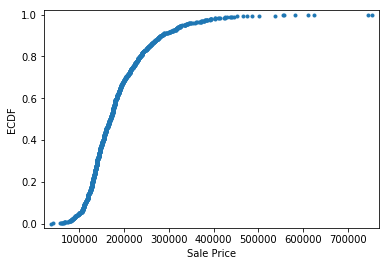

In [23]:
# Make ecdf plot of Sale price:
x, y = ecdf(df.SalePrice)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(.02)
plt.ylabel('ECDF')
plt.xlabel('Sale Price')
plt.show()

The ecdf curve shows that 90% percent of the data has a sale price at or below 300K and confirms what the distribution of score is skewed to the right.

In [24]:
# Calculate the Correlation between Continuous Variables and Sale Price:
resdict = defaultdict(list)
corr_mat = df.corr()
cor_dict = corr_mat['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))
    resdict[ele[0]].append(ele)

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7835456113843237
GrLivArea: 	0.7117061511024302
GarageCars: 	0.6401543580531925
GarageArea: 	0.6075353838509889
1stFlrSF: 	0.6047144846292783
TotalBsmtSF: 	0.6020422814414277
FullBath: 	0.5693126295659892
TotRmsAbvGrd: 	0.5518206950104778
YearBuilt: 	0.504297175093091
YearRemodAdd: 	0.5014353821077956
GarageYrBlt: 	0.48172978591824045
MasVnrArea: 	0.46581143360024846
Fireplaces: 	0.4454344326389212
BsmtFinSF1: 	0.35967663312618064
OpenPorchSF: 	0.3227857346419753
2ndFlrSF: 	0.31135402669959245
WoodDeckSF: 	0.30598288316822747
HalfBath: 	0.2581749248797554
LotArea: 	0.2547573502139699
BsmtFullBath: 	0.20969465592752243
BsmtUnfSF: 	0.1916888789020209
BedroomAbvGr: 	0.16926554693331156
EnclosedPorch: 	-0.12738527654209783
KitchenAbvGr: 	-0.1114081974082277
OverallCond: 	-0.1086270972695443
ScreenPorch: 	0.0966239807980718
PoolArea: 	0.091881076190269
MSSubClass: 	-0.07959851790075388
3SsnPorch: 

The function shows GrLiveArea, GarageCars, GarageArea, 1stFlrSF, TotalBsmtSf and FullBath are varaibles with the highest correlation with 'SalePrice.' We will test weather this correlation is by chance or there is a true correlation between these variables and 'SalePrice'.

In [25]:
# Place Highly correlated Variables in Dataframe:
dfres1 = pd.DataFrame.from_dict(resdict, orient='index')
dfres1 = dfres1[0].apply(pd.Series).drop(0, axis=1)
dfres1.columns = ['Correlation']
Hcv = dfres1[dfres1['Correlation'] > .5]


In [26]:
# Look at each variable individual affect on Sale Price:
for x in dfres1.index:
    a, b = np.polyfit(df[x], df.SalePrice,1)
    print(x)
    print('Slope :',a)
    print('Intercept :',b,'\n')


OverallQual
Slope : 46684.72747139708
Intercept : -103604.66144765816 

GrLivArea
Slope : 107.8863480816208
Intercept : 20877.33022534415 

GarageCars
Slope : 79644.74781574441
Intercept : 37710.62516395813 

GarageArea
Slope : 256.7063426579952
Intercept : 58036.406171184426 

1stFlrSF
Slope : 123.42161027537503
Intercept : 41590.57255064941 

TotalBsmtSF
Slope : 117.14696918730094
Intercept : 58374.83304713307 

FullBath
Slope : 82047.38588144051
Intercept : 57497.291152409125 

TotRmsAbvGrd
Slope : 27472.77514875843
Intercept : 6813.052015157939 

YearBuilt
Slope : 1346.1185850337013
Intercept : -2469169.422400653 

YearRemodAdd
Slope : 1949.6104429714828
Intercept : -3684519.0584063586 

GarageYrBlt
Slope : 1534.4937290025023
Intercept : -2849382.004782902 

MasVnrArea
Slope : 198.0496700522062
Intercept : 164904.9735581099 

Fireplaces
Slope : 54464.433647012105
Intercept : 151429.1005937172 

BsmtFinSF1
Slope : 61.86559712400171
Intercept : 158041.62691241768 

OpenPorchSF
Slope 

In [27]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [28]:
# define function to test correlation:
def test_corr(cols, df=df):
    r_obs = pearson_r(cols, df.SalePrice.values)
    perm_replicates = np.empty(10000)

    for i in range(10000):
        cols_permuted = np.random.permutation(cols)
        perm_replicates[i] = pearson_r(cols_permuted, df.SalePrice.values)

    p = np.sum(perm_replicates >= r_obs ) / len(perm_replicates)
    return print('p-val =', p)

In [29]:
# Loop through variables and test correlation:
for x in dfres1.index :
    if dfres1.loc[x][0] > .5:
        print('\n',x)
        test_corr(df[x].values)


 OverallQual
p-val = 0.0

 GrLivArea
p-val = 0.0

 GarageCars
p-val = 0.0

 GarageArea
p-val = 0.0

 1stFlrSF
p-val = 0.0

 TotalBsmtSF
p-val = 0.0

 FullBath
p-val = 0.0

 TotRmsAbvGrd
p-val = 0.0

 YearBuilt
p-val = 0.0

 YearRemodAdd
p-val = 0.0


These are the variable that have a correlation with sale price higher than .5 and passed the correlation test. Next i want to look as the categorical variables within the data. Below ive defined a function that conducts a chi squared test. I will use this function to test the significance on the categorical variables when predicting sales price.

In [30]:
def Chi_test(data,c1,c2):
    #combine columns into matrix
    table = pd.crosstab(data[c1], data[c2])
    
    colsum = table.sum(axis=0)
    colpct = table / colsum
    cstable = stats.chi2_contingency(table)
    
    return cstable[0], cstable[1], cstable[2]

First we need to identify all the categorical variables with in the dataframe and identify the columns indexes. 

In [31]:
objectcl = df.loc[:, df.dtypes == 'object'].columns

In order for the chi squared test to work, we categorize Sale price. I will split them into 2 groups High Price Homes(HPH) and Low Price Homes(LPH).

In [32]:
# Split Homes by Sale price in 'LPH' and 'HPH':
SPavg = np.mean(df.SalePrice)

bins = [0, SPavg, max(df.SalePrice)+1]

bin_names = ['LPH', 'HPH']

df1 = df.copy()

df1['SPcat'] = pd.cut(df1['SalePrice'], bins, labels=bin_names)

HPH = df1[df1['SalePrice'] >= SPavg ]
LPH = df1[df1['SalePrice'] < SPavg ]

In [33]:
from collections import defaultdict

In [34]:
# Chi-Squared test on Categorical data in DF and filter out variables that have failed test:
res = defaultdict(list)
for x in objectcl:
    Chi_test(df1, x, 'SPcat')
    if Chi_test(df1, x, 'SPcat')[1] < .01 and Chi_test(df1, x, 'SPcat')[2] > 3:
        res[x].append(list(Chi_test(df1, x, 'SPcat')))

In [35]:
#view result in DataFrame:
dfres = pd.DataFrame.from_dict(res, orient='index')
dfres = dfres[0].apply(pd.Series)
columns = ['Chi Statistic','P-Value','Expected Value']
dfres.columns = columns

In [36]:
dfres

,Chi Statistic,P-Value,Expected Value
MSZoning,118.999292,8.737456e-25,4.0
LotConfig,22.748768,1.421318e-04,4.0
Neighborhood,578.482502,7.474895e-107,24.0
Condition1,47.780758,1.088021e-07,8.0
BldgType,31.396279,2.541281e-06,4.0
HouseStyle,118.886455,1.306626e-22,7.0
RoofStyle,15.962580,6.951727e-03,5.0
Exterior1st,241.605635,3.534012e-44,13.0
Exterior2nd,240.270008,1.246502e-42,15.0
Foundation,318.608577,1.047060e-67,4.0


The above dataframe showcases the categorical variables that passed that chi squared test.

In [37]:
catcol = list(dfres.index)
numcol = list(dfres1.index)
predV = catcol + numcol

Add significant numerical and categorical column names into a list.

# Data Preprocessing

In [38]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import  cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [39]:
test = testdf[predV]

In [40]:
predV.append('SalePrice')
train = df[predV]

convert numerical columns that are actually categorical.

In [41]:
train = train.astype({'MSSubClass':'str', 'MoSold':'str', 'YrSold':'str'})

In [42]:
test = test.astype({'MSSubClass':'str', 'MoSold':'str', 'YrSold':'str'})

In [43]:
objs = train.select_dtypes('object').columns
print('Shape training data: {}'.format(train.shape))

Shape training data: (1338, 56)


In [44]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [45]:
X = train.reset_index(drop=True).drop('SalePrice', axis=1)
y = np.log(train.SalePrice)

In [46]:
 numcol = X.loc[:, X.dtypes != np.object].columns

In [47]:
# Check the skew of all numerical features
skewed_feats = X[numcol].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.604954
PoolArea,14.171921
LotArea,11.924736
LowQualFinSF,10.554965
3SsnPorch,10.085230
KitchenAbvGr,5.936896
BsmtFinSF2,4.141869
ScreenPorch,3.912455
BsmtHalfBath,3.843594
EnclosedPorch,3.201692


The above Dataframe shows the numerical columns with skewed values. I will use RobustScaler to transform the numerical columns.

In [48]:
X[skewness.index] = RobustScaler().fit_transform(X[skewness.index])


In [49]:
X = pd.get_dummies(X, columns=objs, drop_first=True)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)


# Model Construction 1: Ridge

In [51]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [52]:
model_ridge = Ridge()

In [53]:
alphas = np.arange(1,30)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas).sort_values()
cv_ridge.head(5)

11    0.125363
10    0.125368
12    0.125374
9     0.125393
13    0.125397
dtype: float64

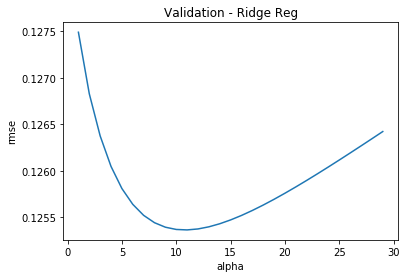

In [54]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Ridge Reg")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [55]:
model_ridge = Ridge(alpha=11).fit(X_train, y_train)

In [56]:
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_ridge).mean()))
print('R2 Score on Training Set:{}'.format(model_ridge.score(X_train, y_train)))
print('R2 Score on Test Set:{}'.format(model_ridge.score(X_test, y_test)))

Root Mean Squared Error of Training:0.12536341302671597
R2 Score on Training Set:0.9212952440169969
R2 Score on Test Set:0.7748752984726724


In [57]:
pred = model_ridge.predict(X_test)

It seems like our model suffers from some overfitting.We will need to use a more flexible machine learning algorithm. Lasso Regrssion algorithm should do the trick. Ridge regression can't zero out coefficients; thus, you either end up including all the coefficients in the model, or none of them. In contrast, the LASSO does both parameter shrinkage and variable selection automatically to develope the best model.

# Model 2 Lasso

In [58]:
model_lasso = Lasso()

In [59]:
alphas = [.0005 ,.001, .005, .01, .05, 1,]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=4000)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

In [60]:
cv_lasso.head()

0.0005    0.124119
0.0010    0.124441
0.0050    0.137530
0.0100    0.143101
0.0500    0.188713
dtype: float64

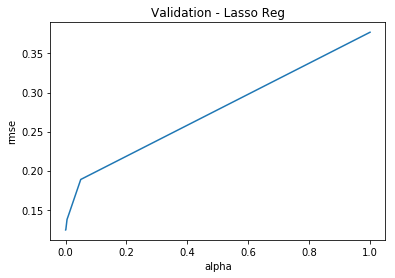

In [61]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Lasso Reg")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [62]:
model_lasso = Lasso(alpha = 0.0005, max_iter=4000).fit(X_train, y_train)

In [63]:
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_lasso).mean()))
print('R2 Score on Training Set:{}'.format(model_lasso.score(X_train, y_train)))
print('R2 Score on Test Set:{}'.format(model_lasso.score(X_test, y_test)))

Root Mean Squared Error of Training:0.12411948391252843
R2 Score on Training Set:0.919036889887928
R2 Score on Test Set:0.7783605491937389


In [64]:
pred2 = model_lasso.predict(X_test)

In [65]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [66]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

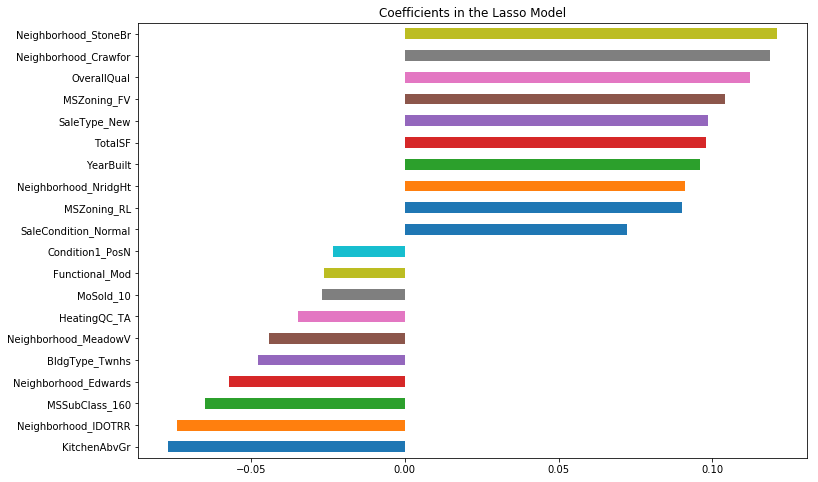

In [67]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.style.use('_classic_test')
plt.show()

The chart above shows that features with the highest coefficients. As predicted, OverallQual, TotalSF, and Neighborhood are among the the variables with the highest coefficients. Looking at some variables with the lowest coeffiecients, we see MSSubclass_160, Neighborhood_Edwards, and KitchenAbvGr. Although these varables negative impact is minimal.

# Model 3: ElasticNet

In [68]:
model_elastic = ElasticNet()

In [69]:
alphas = [.001,.005,.01,.1,]
l1 = [.4, .5, .6,.7, .8]


         
param_grid = dict(alpha=alphas, l1_ratio=l1)
egrid = GridSearchCV(ElasticNet(max_iter=4000), param_grid=param_grid, scoring='neg_mean_squared_error')
egrid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=4000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.005, 0.01, 0.1], 'l1_ratio': [0.4, 0.5, 0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [70]:
print("The best parameter %s for model with a score of %0.2f"
      % (egrid.best_params_, -egrid.best_score_))

The best parameter {'alpha': 0.001, 'l1_ratio': 0.6} for model with a score of 0.02


In [71]:
model_elastic = ElasticNet(alpha=egrid.best_params_['alpha'], l1_ratio=egrid.best_params_['l1_ratio'] ).fit(X_train, y_train)

In [72]:
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_elastic).mean()))
print('R2 Score on Training Set:{}'.format(model_elastic.score(X_train, y_train)))
print('R2 Score on Test Set:{}'.format(model_elastic.score(X_test, y_test)))

Root Mean Squared Error of Training:0.12392734476990756
R2 Score on Training Set:0.9169461765030734
R2 Score on Test Set:0.7772909822688552


In [73]:
pred2 = model_elastic.predict(X_test)

In [74]:
coef = pd.Series(model_elastic.coef_, index = X_train.columns)

In [75]:
imp_coefe = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

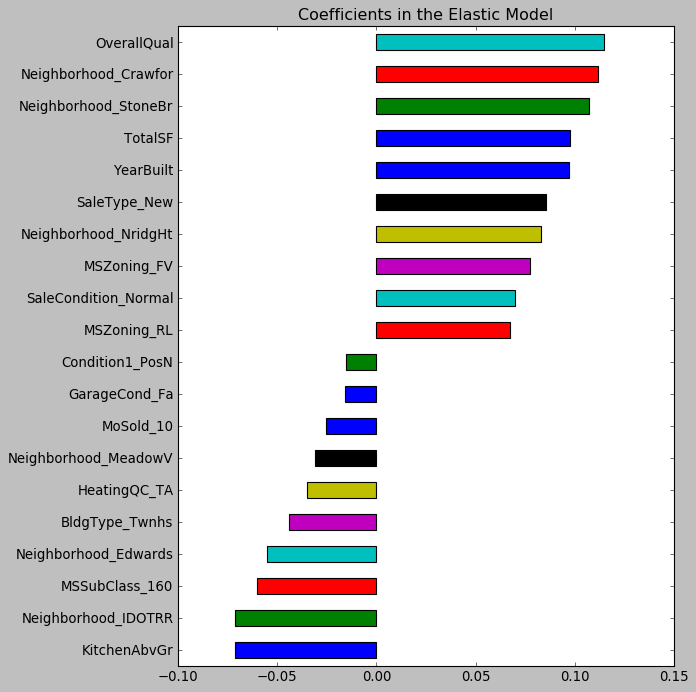

In [76]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coefe.plot(kind = "barh")
plt.title("Coefficients in the Elastic Model")
plt.style.use('_classic_test')
plt.show()

The ElastNet model offered alightly better score(explaination of Variance) then any previous model. I will try to boost the model using the algorithm adaboost 

# ADA Boosting

In [77]:
model = AdaBoostRegressor()

In [78]:
est = [30,50,70]
lr = [.2, .3, .4]
loss = ['linear']

param_grid = dict(n_estimators=est, learning_rate=lr, loss=loss)
grid = GridSearchCV(AdaBoostRegressor(base_estimator = ElasticNet(alpha=.005, l1_ratio=egrid.best_params_['l1_ratio'], max_iter=4000, random_state=2), random_state=1), param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=4000, normalize=False, positive=False, precompute=False,
      random_state=2, selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 50, 70], 'learning_rate': [0.2, 0.3, 0.4], 'loss': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [79]:
print("The best parameter %s for model with a score of %0.2f"
      % (grid.best_params_, -grid.best_score_))

The best parameter {'learning_rate': 0.2, 'loss': 'linear', 'n_estimators': 30} for model with a score of 0.02


In [80]:
model_boost = AdaBoostRegressor(base_estimator = ElasticNet(alpha=.005, l1_ratio=egrid.best_params_['l1_ratio'], random_state=2), learning_rate=grid.best_params_['learning_rate'], loss=grid.best_params_['loss'], n_estimators=grid.best_params_['n_estimators'], random_state=1).fit(X_train, y_train)

In [81]:
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_boost).mean()))
print('R2 Score on Training Set:{}'.format(model_boost.score(X_train, y_train)))
print('R2 Score on Test Set:{}'.format(model_boost.score(X_test, y_test)))

Root Mean Squared Error of Training:0.14557638241152698
R2 Score on Training Set:0.8949971111297853
R2 Score on Test Set:0.8221775500715122


In [82]:
pred3 = model_boost.predict(X_test)

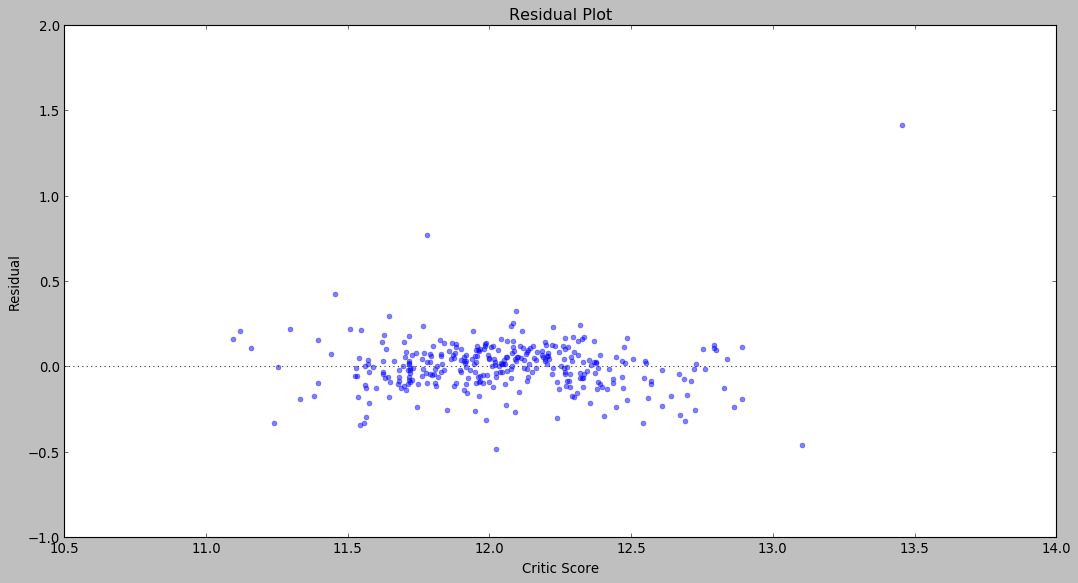

In [83]:
#Make Residual plt: 
plt.rcParams['figure.figsize'] = (16.0, 8.0)
resid =  pred3 - y_test
sns.residplot(pred3, resid, scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Residual')
plt.xlabel('Critic Score')
plt.title('Residual Plot')
plt.show()